In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
# 1. Load the dataset
df = pd.read_csv("IGNOAPS_data.csv")
df.head()

,fin_year,mnth,lgd_state_code,state_name,lgd_district_code,district_name,scheme_code,total_beneficiaries,total_sc,total_st,total_gen,total_obc,total_aadhar,total_mobileno,lastUpdated
0,2024-2025,6,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,3979,2,1458,2280,239,3696,5,30-07-2024
1,2024-2025,6,1,JAMMU AND KASHMIR,13,SRINAGAR,IGNOAPS,5298,0,1,5296,1,5069,3399,30-07-2024
2,2024-2025,6,1,JAMMU AND KASHMIR,2,BADGAM,IGNOAPS,11806,259,72,11251,224,11802,3795,30-07-2024
3,2024-2025,6,1,JAMMU AND KASHMIR,7,KATHUA,IGNOAPS,4180,1345,176,2210,449,4175,180,30-07-2024
4,2024-2025,6,10,BIHAR,188,ARARIA,IGNOAPS,110634,12180,333,96745,1376,78720,77636,30-07-2024


In [63]:
print(df.head())
print(df.tail())
print(df.describe())
print(df.columns)
print(df.dropna())

    fin_year  mnth  lgd_state_code         state_name  lgd_district_code  \
0  2024-2025     6               1  JAMMU AND KASHMIR                 10   
1  2024-2025     6               1  JAMMU AND KASHMIR                 13   
2  2024-2025     6               1  JAMMU AND KASHMIR                  2   
3  2024-2025     6               1  JAMMU AND KASHMIR                  7   
4  2024-2025     6              10              BIHAR                188   

  district_name scheme_code  total_beneficiaries  total_sc  total_st  \
0        POONCH     IGNOAPS                 3979         2      1458   
1      SRINAGAR     IGNOAPS                 5298         0         1   
2        BADGAM     IGNOAPS                11806       259        72   
3        KATHUA     IGNOAPS                 4180      1345       176   
4        ARARIA     IGNOAPS               110634     12180       333   

   total_gen  total_obc  total_aadhar  total_mobileno lastUpdated  
0       2280        239          3696     

In [64]:
# Basic EDA (Exploratory Data Analysis)

# 1. Shape and column info
shape = df.shape
columns = df.columns.tolist()

# 2. Summary statistics of numeric columns
summary_stats = df.describe()

# 3. Null values in each column
missing_values = df.isnull().sum()

# 4. Unique values in categorical columns
unique_schemes = df['scheme_code'].unique()
unique_states = df['state_name'].nunique()
unique_months = df['mnth'].unique()

{
    "Shape": shape,
    "Columns": columns,
    "Summary_Stats": summary_stats,
    "Missing_Values": missing_values,
    "Unique_Schemes": unique_schemes,
    "Total_Unique_States": unique_states,
    "Unique_Months": unique_months
}


{'Shape': (14550, 15),
 'Columns': ['fin_year',
  'mnth',
  'lgd_state_code',
  'state_name',
  'lgd_district_code',
  'district_name',
  'scheme_code',
  'total_beneficiaries',
  'total_sc',
  'total_st',
  'total_gen',
  'total_obc',
  'total_aadhar',
  'total_mobileno',
  'lastUpdated'],
 'Summary_Stats':                mnth  lgd_state_code  lgd_district_code  total_beneficiaries  \
 count  14550.000000    14550.000000       14550.000000         14550.000000   
 mean       6.595395       18.013608         366.021031         36120.118282   
 std        3.253036        9.791346         212.742169         38684.562627   
 min        1.000000        1.000000           1.000000           120.000000   
 25%        4.000000        9.000000         182.000000          9310.250000   
 50%        6.000000       19.000000         364.000000         22292.500000   
 75%       10.000000       24.000000         546.000000         50776.000000   
 max       12.000000       38.000000         763.00

In [65]:
# Load basic details
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# Summary statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Unique entries in important columns
print("\nUnique Schemes:", df['scheme_code'].unique())
print("Number of Unique States:", df['state_name'].nunique())
print("Unique Months:", df['mnth'].unique())


Shape of Dataset: (14550, 15)

Columns: ['fin_year', 'mnth', 'lgd_state_code', 'state_name', 'lgd_district_code', 'district_name', 'scheme_code', 'total_beneficiaries', 'total_sc', 'total_st', 'total_gen', 'total_obc', 'total_aadhar', 'total_mobileno', 'lastUpdated']

--- Summary Statistics ---
               mnth  lgd_state_code  lgd_district_code  total_beneficiaries  \
count  14550.000000    14550.000000       14550.000000         14550.000000   
mean       6.595395       18.013608         366.021031         36120.118282   
std        3.253036        9.791346         212.742169         38684.562627   
min        1.000000        1.000000           1.000000           120.000000   
25%        4.000000        9.000000         182.000000          9310.250000   
50%        6.000000       19.000000         364.000000         22292.500000   
75%       10.000000       24.000000         546.000000         50776.000000   
max       12.000000       38.000000         763.000000        278410.000

<Axes: title={'center': 'Record Count per Scheme'}, xlabel='scheme_code'>

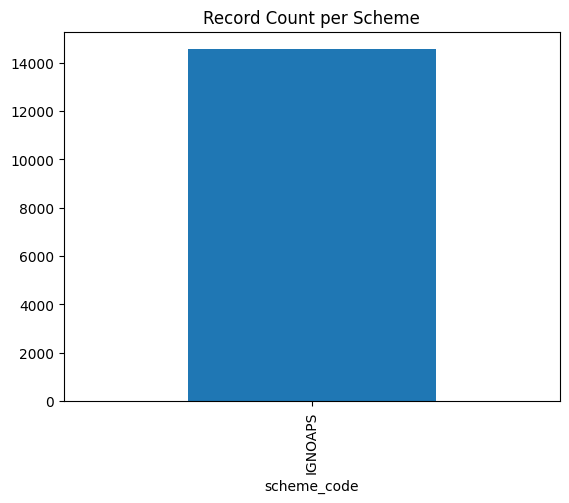

In [66]:
df['scheme_code'].value_counts().plot(kind='bar', title='Record Count per Scheme')

<Axes: ylabel='state_name'>

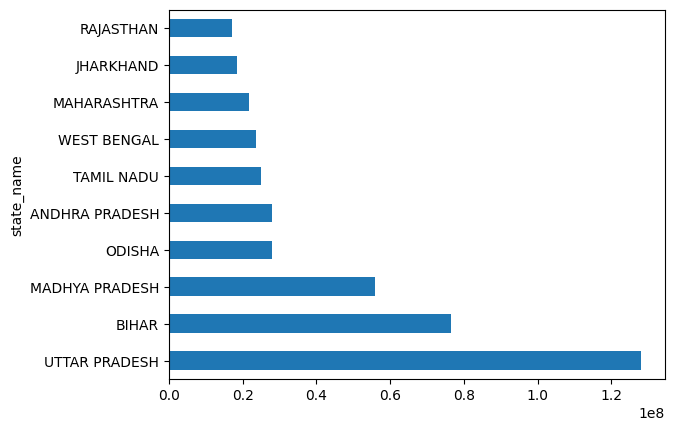

In [67]:
df.groupby('state_name')['total_beneficiaries'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

### 1) Temporal Analysis: Examine trends over time (monthly or yearly) to identify patterns or seasonal variations in beneficiary counts and fund allocation.

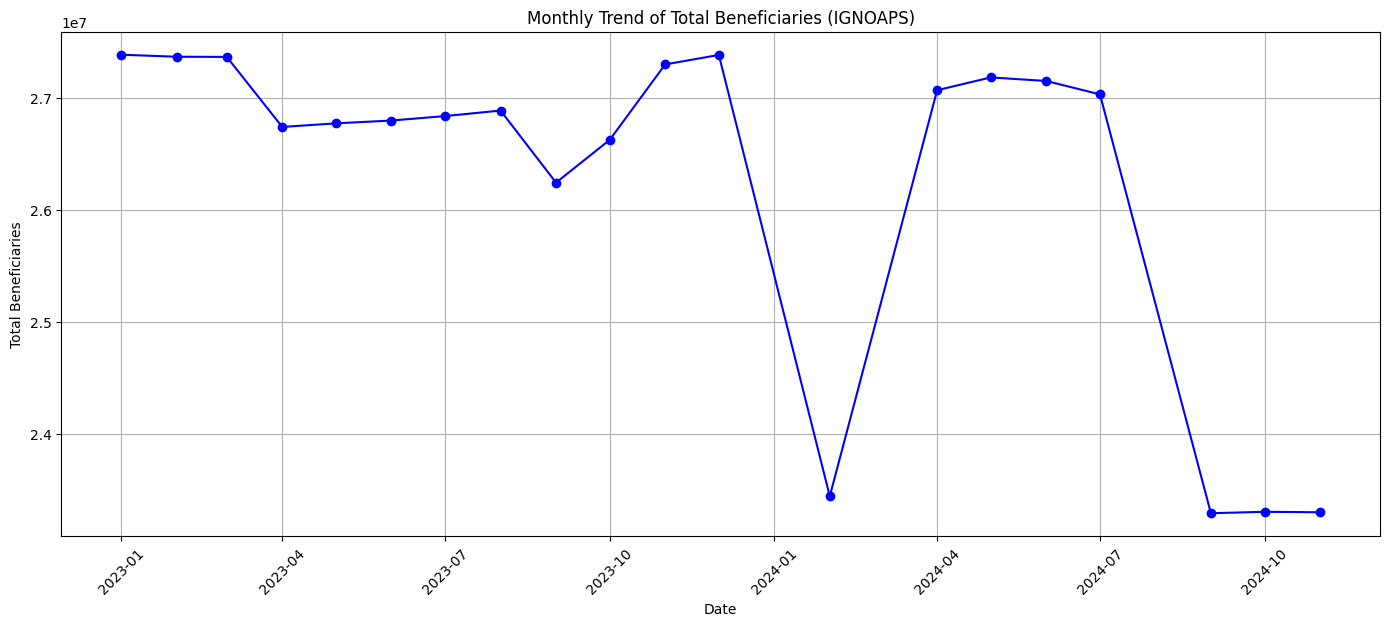

In [68]:
# Create a proper datetime column using 'fin_year' and 'mnth'
df['year'] = df['fin_year'].str[:4].astype(int)  # Extract starting year from '2024-2025'
df['month'] = df['mnth']
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Group by date (monthly) for trend analysis
monthly_trend = df.groupby('date')['total_beneficiaries'].sum()

# Plotting the monthly trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', color='blue')
plt.title("Monthly Trend of Total Beneficiaries (IGNOAPS)")
plt.xlabel("Date")
plt.ylabel("Total Beneficiaries")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### 2) Geographical Distribution: Analyze the distribution of beneficiaries across different states or regions to identify areas with higher or lower uptake of the scheme.

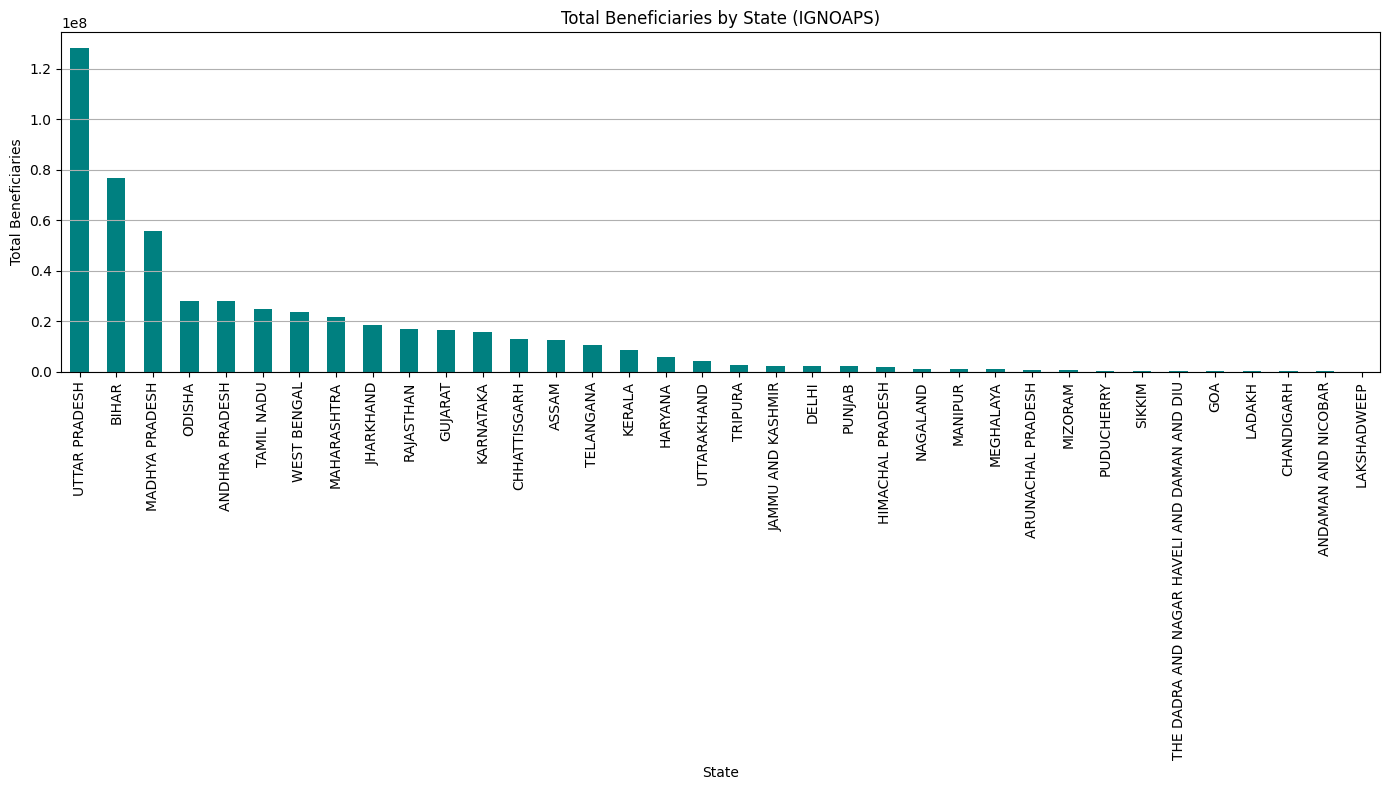

In [69]:
# Grouping the data by state to analyze geographical distribution
statewise_beneficiaries = df.groupby('state_name')['total_beneficiaries'].sum().sort_values(ascending=False)

# Plotting the statewise total beneficiaries
plt.figure(figsize=(14, 8))
statewise_beneficiaries.plot(kind='bar', color='teal')
plt.title("Total Beneficiaries by State (IGNOAPS)")
plt.xlabel("State")
plt.ylabel("Total Beneficiaries")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 3)Demographic Analysis: If demographic data is available, assess the age and gender distribution of beneficiaries to understand the reach among various population segments.

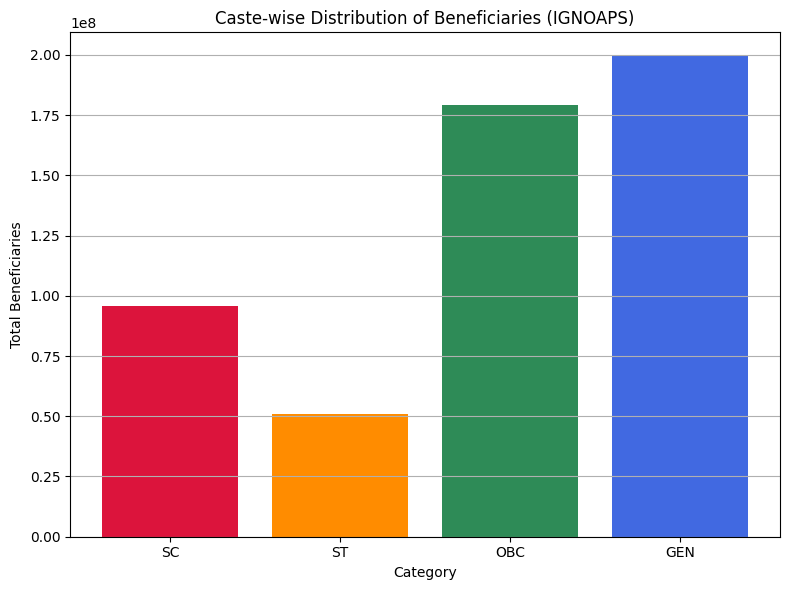

In [70]:
# Total sum for each demographic category
demographic_totals = {
    'SC': df['total_sc'].sum(),
    'ST': df['total_st'].sum(),
    'OBC': df['total_obc'].sum(),
    'GEN': df['total_gen'].sum()
}

# Plotting demographic category distribution
plt.figure(figsize=(8, 6))
plt.bar(demographic_totals.keys(), demographic_totals.values(), color=['crimson', 'darkorange', 'seagreen', 'royalblue'])
plt.title("Caste-wise Distribution of Beneficiaries (IGNOAPS)")
plt.xlabel("Category")
plt.ylabel("Total Beneficiaries")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 4) Expenditure Analysis: Investigate the relationship between allocated funds and the number of beneficiaries to evaluate the efficiency of fund utilization.

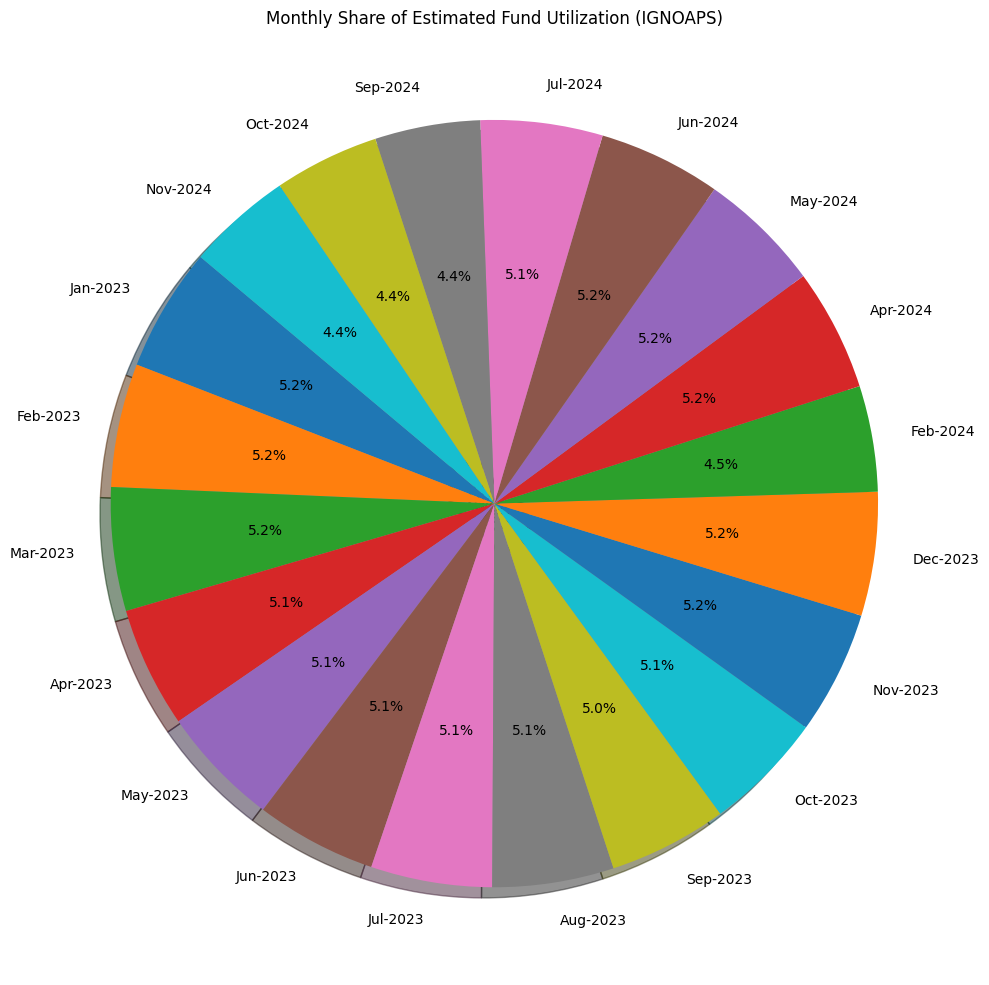

In [71]:
# Total fund utilized per month
monthly_fund = monthly_data['fund_utilized']

# Plotting pie chart
plt.figure(figsize=(10, 10))
plt.pie(monthly_fund, labels=monthly_fund.index.strftime('%b-%Y'), 
        autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Monthly Share of Estimated Fund Utilization (IGNOAPS)")
plt.axis('equal')  # Equal aspect ratio to ensure pie is circular
plt.tight_layout()
plt.show()


### 5) Comparative Analysis: Compare IGNOAPS data with other schemes under NSAP, such as the Indira Gandhi National Widow Pension Scheme (IGNWPS), to assess relative performance and coverage.

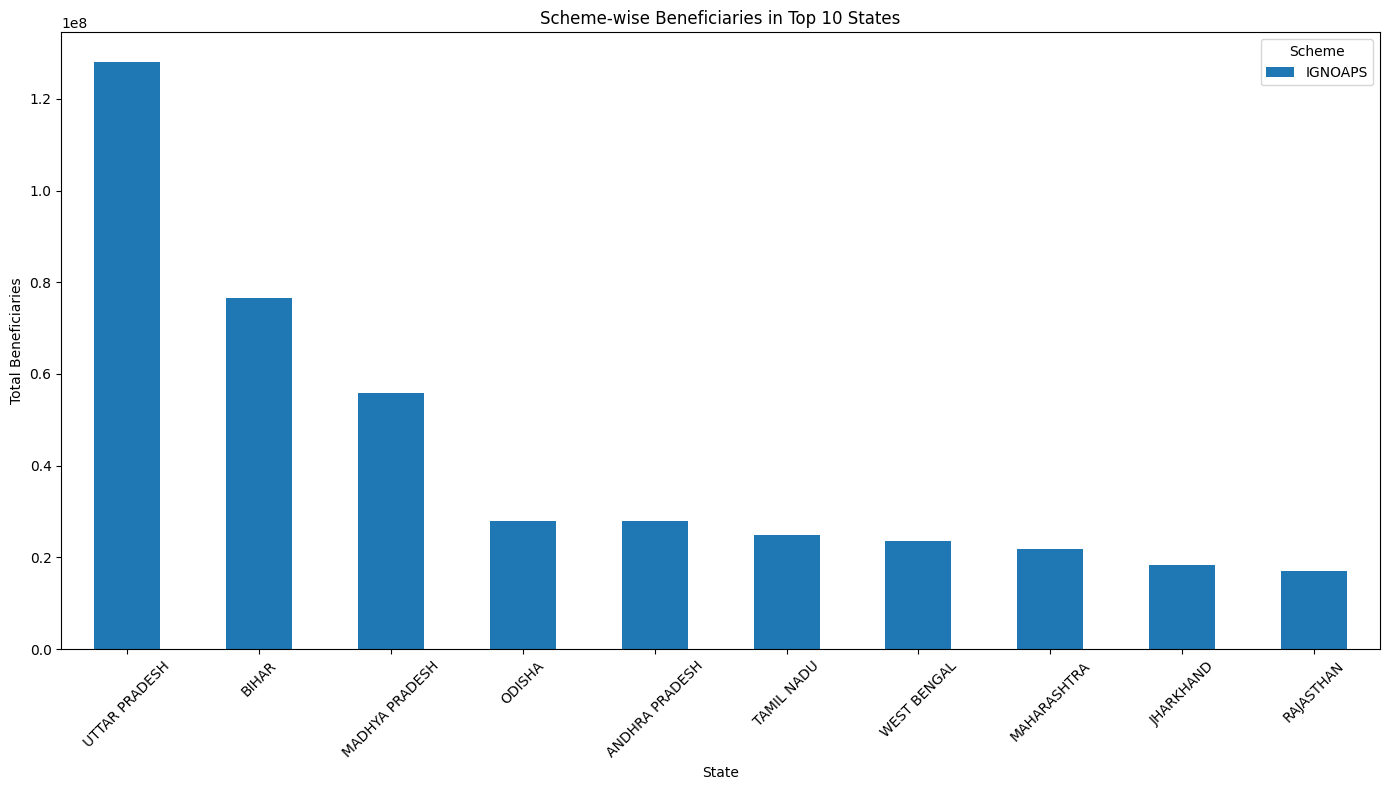

In [72]:
state_scheme = df.groupby(['state_name', 'scheme_code'])['total_beneficiaries'].sum().unstack().fillna(0)

# Top 10 states by total across all schemes
top_states = state_scheme.sum(axis=1).sort_values(ascending=False).head(10)
state_scheme.loc[top_states.index].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Scheme-wise Beneficiaries in Top 10 States")
plt.xlabel("State")
plt.ylabel("Total Beneficiaries")
plt.xticks(rotation=45)
plt.legend(title='Scheme')
plt.tight_layout()
plt.show()
